## Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import uuid
import os
import ast
import unicodedata
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics.pairwise import cosine_similarity

## Load Dataset

In [2]:
df_recipes = pd.read_csv('../data/raw/Food Ingredients and Recipe Dataset with Image Name Mapping.csv')
df_numFeature = pd.read_csv('../data/raw/epi_r.csv')

## Exploratory Data Analysis

### Data Recipes

In [3]:
df_recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13501 entries, 0 to 13500
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           13501 non-null  int64 
 1   Title                13496 non-null  object
 2   Ingredients          13501 non-null  object
 3   Instructions         13493 non-null  object
 4   Image_Name           13501 non-null  object
 5   Cleaned_Ingredients  13501 non-null  object
dtypes: int64(1), object(5)
memory usage: 633.0+ KB


In [4]:
df_recipes.shape

(13501, 6)

In [5]:
df_recipes.isnull().sum()

Unnamed: 0             0
Title                  5
Ingredients            0
Instructions           8
Image_Name             0
Cleaned_Ingredients    0
dtype: int64

In [6]:
df_recipes.duplicated().sum()

0

In [7]:
df_recipes[df_recipes.duplicated(subset="Ingredients", keep=False)]

,Unnamed: 0,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients
174,174,White Russian,"['1½ oz. vodka', '¾ oz. Kahlúa', '¾ oz. heavy ...",Combine all the ingredients in a cocktail shak...,white-russian-simonson-3-ingredient-cocktails,"['1½ oz. vodka', '¾ oz. Kahlúa', '¾ oz. heavy ..."
351,351,Aviation,"['2 oz. Tanqueray gin', '0.75 oz. lemon juice'...","Shake with ice, then fine-strain into a chille...",aviation-cocktail-gin-violette,"['2 oz. Tanqueray gin', '0.75 oz. lemon juice'..."
356,356,Manhattan,"['2 ounces rye or bourbon whiskey', '1 ounce s...",In mixing glass or cocktail shaker filled with...,manhattan-238166,"['2 ounces rye or bourbon whiskey', '1 ounce s..."
360,360,Negroni,"['2 tablespoons (1 ounce) sweet vermouth', '2 ...","In chilled cocktail shaker or pint glass, stir...",negroni-351597,"['2 tablespoons (1 ounce) sweet vermouth', '2 ..."
549,549,Sazerac,"['1 cube or 1/2 teaspoon sugar', '4 dashes Pey...","In old-fashioned glass, add ice and set aside....",sazerac-237263,"['1 cube or 1/2 teaspoon sugar', '4 dashes Pey..."
2083,2083,Jammy Soft-Boiled Eggs,['4–8 large eggs'],Bring a large saucepan of water to a boil over...,jammy-soft-boiled-eggs,['4–8 large eggs']
2091,2091,Hard-Boiled Eggs,['4–8 large eggs'],Bring a large saucepan of water to a boil over...,hard-boiled-eggs-recipe,['4–8 large eggs']
2698,2698,Watermelon and Feta With Lime and Serrano Chil...,"['3 pounds seedless watermelon, rind removed, ...",Place the watermelon in a large mixing bowl. A...,watermelon-and-feta-salad-with-lime-and-serran...,"['3 pounds seedless watermelon, rind removed, ..."
2888,2888,Aviation,"['2 oz. Tanqueray gin', '0.75 oz. lemon juice'...","Shake with ice, then fine-strain into a chille...",aviation-cocktail,"['2 oz. Tanqueray gin', '0.75 oz. lemon juice'..."
2979,2979,"My Cobb Salad: Iceberg, Tomato, Avocado, Bacon...","['2 1/2 ounces smoked bacon, rind removed, cut...","In a large, dry skillet, brown the bacon over ...",cobb-salad-iceberg-tomato-avocado-bacon-and-bl...,"['2 1/2 ounces smoked bacon, rind removed, cut..."


In [8]:
# show visualisasi volume of duplicated data between title and ingredients
duplicated_data = df_recipes[df_recipes.duplicated(subset=["Title", "Ingredients", "Instructions", "Cleaned_Ingredients"], keep=False)]
print(f"Number of duplicated data: {len(duplicated_data)}")
duplicated_data.head()

Number of duplicated data: 25


,Unnamed: 0,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients
174,174,White Russian,"['1½ oz. vodka', '¾ oz. Kahlúa', '¾ oz. heavy ...",Combine all the ingredients in a cocktail shak...,white-russian-simonson-3-ingredient-cocktails,"['1½ oz. vodka', '¾ oz. Kahlúa', '¾ oz. heavy ..."
351,351,Aviation,"['2 oz. Tanqueray gin', '0.75 oz. lemon juice'...","Shake with ice, then fine-strain into a chille...",aviation-cocktail-gin-violette,"['2 oz. Tanqueray gin', '0.75 oz. lemon juice'..."
356,356,Manhattan,"['2 ounces rye or bourbon whiskey', '1 ounce s...",In mixing glass or cocktail shaker filled with...,manhattan-238166,"['2 ounces rye or bourbon whiskey', '1 ounce s..."
360,360,Negroni,"['2 tablespoons (1 ounce) sweet vermouth', '2 ...","In chilled cocktail shaker or pint glass, stir...",negroni-351597,"['2 tablespoons (1 ounce) sweet vermouth', '2 ..."
549,549,Sazerac,"['1 cube or 1/2 teaspoon sugar', '4 dashes Pey...","In old-fashioned glass, add ice and set aside....",sazerac-237263,"['1 cube or 1/2 teaspoon sugar', '4 dashes Pey..."


In [9]:
df_recipes.columns

Index(['Unnamed: 0', 'Title', 'Ingredients', 'Instructions', 'Image_Name',
       'Cleaned_Ingredients'],
      dtype='object')

In [10]:
df_recipes.head()

,Unnamed: 0,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients
0,0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher..."
1,1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (..."
2,2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ..."
3,3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in..."
4,4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho..."


Hasil EDA awal data recipes :
- Total row data : 13.501
- Total coulumn data : 6
- Data tersebut memiliki missing value pada Title & Instruction sebanyak :
  Title : 5
  Instructions : 8
- Data tersebut tidak memiliki duplikat data yang sama persis pada satu baris
- Data tersebut memiliki title yang sama namun ada ynag memiliki instruction dan ingredients yang berbeda

### Data numFeature (Nutrition & Binary Feature Ingredients_Tags)

In [11]:
df_numFeature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


In [12]:
df_numFeature.columns

Index(['title', 'rating', 'calories', 'protein', 'fat', 'sodium', '#cakeweek',
       '#wasteless', '22-minute meals', '3-ingredient recipes',
       ...
       'yellow squash', 'yogurt', 'yonkers', 'yuca', 'zucchini', 'cookbooks',
       'leftovers', 'snack', 'snack week', 'turkey'],
      dtype='object', length=680)

In [13]:
df_numFeature.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df_numFeature.shape

(20052, 680)

In [15]:
missingCols = df_numFeature.isnull().sum()
print("Missing cols :")
missingCols[missingCols > 0]

Missing cols :


calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [16]:
print("Total row duplicate : ",df_numFeature.duplicated().sum())

Total row duplicate :  1801


In [17]:
df_numFeature.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
nutri_cols = ["calories", "protein", "fat", "sodium"]
df_nutri = df_numFeature[nutri_cols]

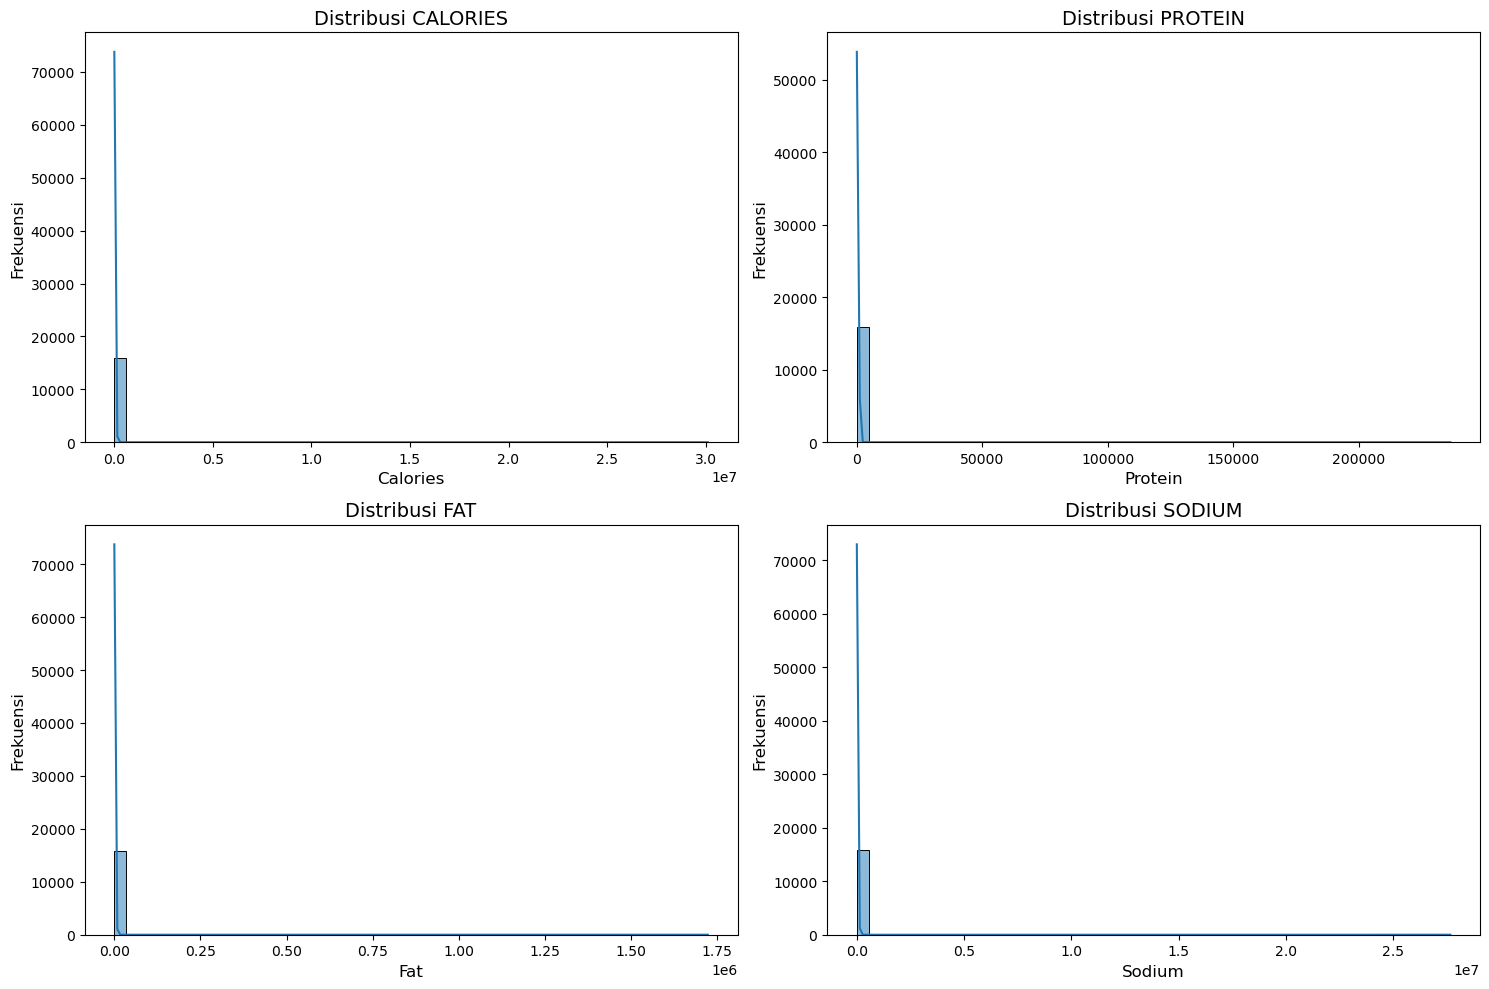

In [19]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(nutri_cols):
    plt.subplot(2, 2, i + 1) # Membuat 4 subplot (2 baris, 2 kolom)
    
    # Menggunakan displot dengan parameter hist_kws untuk batas bin
    sns.histplot(df_nutri[col], kde=True, bins=50) 
    
    plt.title(f'Distribusi {col.upper()}', fontsize=14)
    plt.xlabel(col.capitalize(), fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)

plt.tight_layout()
plt.show()

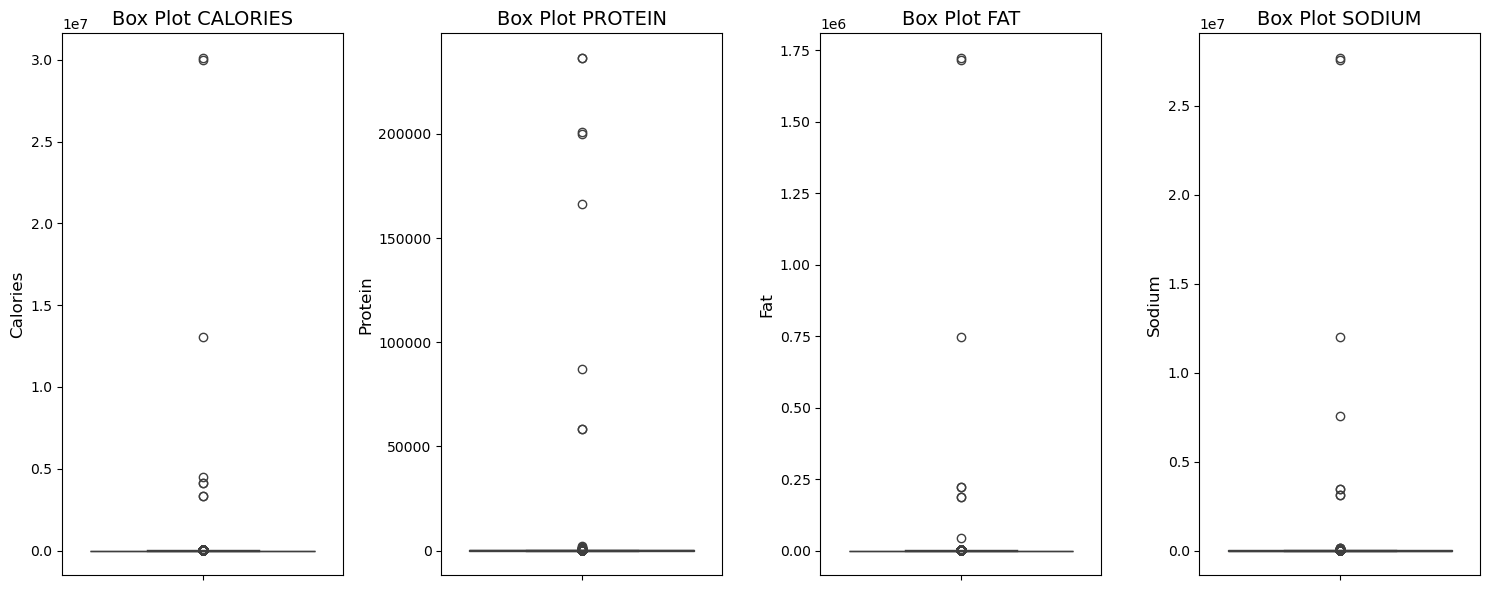

In [20]:
plt.figure(figsize=(15, 6))

for i, col in enumerate(nutri_cols):
    plt.subplot(1, 4, i + 1)
    
    # Menggunakan Box Plot
    sns.boxplot(y=df_nutri[col]) 
    
    plt.title(f'Box Plot {col.upper()}', fontsize=14)
    plt.ylabel(col.capitalize(), fontsize=12)

plt.tight_layout()
plt.show()

In [21]:
df_numFeature[nutri_cols].skew()

calories    77.020976
protein     53.564238
fat         78.151565
sodium      75.306959
dtype: float64

In [22]:
for col in nutri_cols:
    print(f"--- KOLOM: {col.upper()} ---")

    # 1. Menampilkan 10 Data Terbesar (Nilai Ekstrem Kanan)
    print(f"\n10 RESEP DENGAN {col.upper()} TERBESAR:")
    largest = df_numFeature.nlargest(10, col)[['title', col]]
    print(largest)
    
    # 2. Menampilkan 10 Data Terkecil (Nilai Ekstrem Kiri/Dekat Nol)
    print(f"\n10 RESEP DENGAN {col.upper()} TERKECIL:")
    smallest = df_numFeature.nsmallest(10, col)[['title', col]]
    print(smallest)
    
    print("\n" + "="*40)

--- KOLOM: CALORIES ---

10 RESEP DENGAN CALORIES TERBESAR:
                                                   title    calories
11391              Pear-Cranberry Mincemeat Lattice Pie   30111218.0
6368                       Deep-Dish Wild Blueberry Pie   29997918.0
19672                 Apricot, Cranberry and Walnut Pie   13062948.0
2976                      Lamb Köfte with Tarator Sauce    4518216.0
1304         Rice Pilaf with Lamb, Carrots, and Raisins    4157357.0
9731         Rice Pilaf with Lamb, Carrots, and Raisins    4157357.0
6912                               Chocolate-Almond Pie    3358273.0
5138                     Caramelized Apple and Pear Pie    3358029.0
16208  Merguez Lamb Patties with Golden Raisin Couscous      54512.0
8192            Grilled Lamb Chops with Porcini Mustard      24117.0

10 RESEP DENGAN CALORIES TERKECIL:
                               title  calories
285        Salted Water for Boiling        0.0
1479   Cashew Milk and Cashew Flour        0.0
1674

In [23]:
# Asumsikan df_numFeature adalah DataFrame yang mengandung data Anda.
nutri_cols = ["calories", "protein", "fat", "sodium"]

print("--- RESEP DENGAN KANDUNGAN NUTRISI TERTINGGI (PERINGKAT 1) ---")
print("="*60)

for col in nutri_cols:
    # Menggunakan nlargest(1, col) untuk mendapatkan hanya satu baris terbesar
    largest = df_numFeature.nlargest(1, col)[['title', col]]
    
    # Ambil Judul dan Nilai dari baris pertama (satu-satunya)
    title = largest['title'].iloc[0]
    value = largest[col].iloc[0]
    
    print(f"\nPeringkat 1 {col.upper()}:")
    print(f"   Nilai: {value:,.0f}")
    print(f"   Resep: {title}")
    
    print("-" * 30)

print("\n" + "="*60)

--- RESEP DENGAN KANDUNGAN NUTRISI TERTINGGI (PERINGKAT 1) ---

Peringkat 1 CALORIES:
   Nilai: 30,111,218
   Resep: Pear-Cranberry Mincemeat Lattice Pie 
------------------------------

Peringkat 1 PROTEIN:
   Nilai: 236,489
   Resep: Rice Pilaf with Lamb, Carrots, and Raisins 
------------------------------

Peringkat 1 FAT:
   Nilai: 1,722,763
   Resep: Pear-Cranberry Mincemeat Lattice Pie 
------------------------------

Peringkat 1 SODIUM:
   Nilai: 27,675,110
   Resep: Pear-Cranberry Mincemeat Lattice Pie 
------------------------------



Hasil EDA awal data num Feature :
- Total row data : 20052
- Total column data : 680
- Data tersebut memiliki missing value pada calories, protein, fat, dan sodium sebanyak :
  calories    4117
  protein     4162
  fat         4183
  sodium      4119
- Data tersebut memiliki duplikat data yang sama persis pada satu baris sebanyak : 1801 row
- Data tersebut memiliki title yang sama namun ada yang memiliki nutrition, binary ingredients,
  dan binary tag yang berbeda

- Data tersebut memiliki right skewness yang tidak masuk akal
- Berdasarkan analisis Nutrition dengan melihat data terbesar pada tiap fitur pada nutrition sebagai
  berikut :
  
  Peringkat 1 CALORIES:
  Nilai: 30,111,218
  Resep: Pear-Cranberry Mincemeat Lattice Pie 

  Peringkat 1 PROTEIN:
  Nilai: 236,489
  Resep: Rice Pilaf with Lamb, Carrots, and Raisins 

  Peringkat 1 FAT:
  Nilai: 1,722,763
  Resep: Pear-Cranberry Mincemeat Lattice Pie 

  Peringkat 1 SODIUM:
  Nilai: 27,675,110
  Resep: Pear-Cranberry Mincemeat Lattice Pie 

  Data tersebut sangat tidak masuk akal dan potensinya sangat besar bahwa itu adalah salah input atau
  kesalahan scrapping data pada dataset nutrition di website Epicurious.

## Preprocessing

### Cleaning Data Recipes

Hasil EDA awal data receipt :
- Total row data : 13.501
- Total coulumn data : 6
- Data tersebut memiliki missing value pada Title & Instruction sebanyak :
  - Title : 5
  - Instructions : 8
- Data tersebut tidak memiliki duplikat data yang sama persis pada satu baris
- Data tersebut memiliki title yang sama namun ada ynag memiliki instruction dan ingredients yang berbeda

In [24]:
# 1) Drop Missing value
df_recipes_cleaned = df_recipes.dropna(subset=['Title', 'Instructions'])
df_recipes_cleaned.isnull().sum()

Unnamed: 0             0
Title                  0
Ingredients            0
Instructions           0
Image_Name             0
Cleaned_Ingredients    0
dtype: int64

In [25]:
# 2) Normalisasi teks dasar
df_recipes_cleaned['title_lower'] = df_recipes['Title'].str.strip().str.lower()

C:\Users\ardik\AppData\Local\Temp\ipykernel_27944\2478757074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recipes_cleaned['title_lower'] = df_recipes['Title'].str.strip().str.lower()


In [26]:
# 3) Vocabulary Ingredients dari numFeatures dan normalisasi
binary_ingredients_cols = [
    'almond', 'anchovy', 'anise', 'apple', 'apricot', 'arugula', 'asparagus', 'avocado',
    'bacon', 'banana', 'barley', 'basil', 'bean', 'beef', 'beer', 'bell pepper', 'berry',
    'biscuit', 'blackberry', 'blood orange', 'blue cheese', 'blueberry', 'bonito',
    'bourbon', 'brandy', 'bread', 'broccoli', 'brownie', 'brussels sprout', 'bulgur',
    'butter', 'buttermilk', 'cabbage', 'cake', 'candy', 'cantaloupe', 'capers', 'cardamom',
    'carrot', 'cashew', 'cauliflower', 'caviar', 'celery', 'champagne', 'chard', 'cheddar',
    'cheese', 'cherry', 'chestnut', 'chicken', 'chickpea', 'chile', 'chili', 'chocolate',
    'chive', 'cilantro', 'cinnamon', 'citrus', 'clam', 'clove', 'club soda', 'coconut',
    'cod', 'coffee', 'cookie', 'coriander', 'corn', 'cornmeal', 'cottage cheese', 'couscous',
    'crab', 'cranberry', 'cream cheese', 'cucumber', 'cumin', 'cupcake', 'currant', 'curry',
    'dashima', 'date', 'dill', 'duck', 'edible flower', 'egg', 'eggplant', 'endive',
    'fennel', 'feta', 'fig', 'fish', 'fontina', 'garlic', 'gelatin', 'gin', 'ginger',
    'goat cheese', 'goose', 'gouda', 'grape', 'grapefruit', 'ground beef', 'guava',
    'halibut', 'ham', 'hazelnut', 'honey', 'horseradish', 'hot pepper', 'hummus',
    'ice cream', 'jalapeño', 'jam', 'jerusalem artichoke', 'jícama', 'kale', 'kirsch',
    'kiwi', 'kohlrabi', 'kombu', 'kumquat', 'lamb', 'leek', 'lemon', 'lemonade',
    'lemongrass', 'lentil', 'lettuce', 'lime', 'liqueur', 'lobster', 'macadamia nut',
    'mango', 'maple syrup', 'margarita', 'marshmallow', 'marzipan', 'mayonnaise', 'melon',
    'milk', 'mint', 'molasses', 'mozzarella', 'muffin', 'mushroom', 'mussel', 'mustard',
    'nectarine', 'noodle', 'nut', 'nutmeg', 'oat', 'okra', 'olive', 'onion', 'orange',
    'oregano', 'oyster', 'pancake', 'papaya', 'paprika', 'parmesan', 'parsley', 'parsnip',
    'passion fruit', 'pasta', 'pastry', 'pea', 'peach', 'peanut', 'peanut butter', 'pear',
    'pecan', 'pepper', 'persimmon', 'pesto', 'pickle', 'pie', 'pine nut', 'pineapple',
    'pistachio', 'pizza', 'plantain', 'plum', 'pomegranate', 'pork', 'potato', 'prosciutto',
    'prosecco', 'prune', 'pumpkin', 'quail', 'quark', 'quince', 'quinoa', 'radicchio',
    'radish', 'raisin', 'raspberry', 'rhubarb', 'ribs', 'rice', 'ricotta', 'rosemary',
    'rose petal', 'rum', 'rutabaga', 'rye', 'saffron', 'sage', 'salmon', 'salsa',
    'sandwich', 'sauce', 'sausage', 'scallion', 'scallop', 'seaweed', 'sesame', 'shallot',
    'shellfish', 'shrimp', 'skim milk', 'smoothie', 'snapper', 'sorbet', 'sour cream',
    'soy', 'soy sauce', 'spinach', 'squash', 'squid', 'steak', 'strawberry', 'sugar',
    'sugar snap pea', 'sunflower seed', 'sweet potato', 'swiss cheese', 'swordfish',
    'taco', 'tamarind', 'tangerine', 'tapioca', 'tarragon', 'tea', 'tequila', 'thyme',
    'tilapia', 'tofu', 'tomatillo', 'tomato', 'tortillas', 'trout', 'truffle', 'tuna',
    'turkey', 'turmeric', 'turnip', 'vanilla', 'veal', 'venison', 'vermouth', 'vinegar',
    'vodka', 'wakame', 'walnut', 'wasabi', 'water', 'watercress', 'watermelon', 'whiskey',
    'white wine', 'whole wheat', 'wild rice', 'wine', 'yeast', 'yogurt', 'yuca', 'zucchini'
]

binary_terms = [b.lower() for b in binary_ingredients_cols]

In [27]:
df_recipes_cleaned.duplicated().sum()

0

In [28]:
# check df_recipes_cleaned duplicates in Title, Ingredients, Instructions
duplicates_cleaned = df_recipes_cleaned.duplicated(subset=['Title', 'Ingredients', 'Instructions'], keep=False)
print(duplicates_cleaned.sum())

# print the table of duplicates
print(df_recipes_cleaned[duplicates_cleaned][['Title', 'Ingredients', 'Instructions']])

# delete duplicates
df_recipes_cleaned = df_recipes_cleaned.drop_duplicates(subset=['Title', 'Ingredients', 'Instructions'], keep='first')

20
                   Title                                        Ingredients  \
174        White Russian  ['1½ oz. vodka', '¾ oz. Kahlúa', '¾ oz. heavy ...   
351             Aviation  ['2 oz. Tanqueray gin', '0.75 oz. lemon juice'...   
356            Manhattan  ['2 ounces rye or bourbon whiskey', '1 ounce s...   
360              Negroni  ['2 tablespoons (1 ounce) sweet vermouth', '2 ...   
549              Sazerac  ['1 cube or 1/2 teaspoon sugar', '4 dashes Pey...   
2888            Aviation  ['2 oz. Tanqueray gin', '0.75 oz. lemon juice'...   
8384           Manhattan  ['2 ounces rye or bourbon whiskey', '1 ounce s...   
9365             Sazerac  ['1 cube or 1/2 teaspoon sugar', '4 dashes Pey...   
9404            Aviation  ['2 oz. Tanqueray gin', '0.75 oz. lemon juice'...   
10296  Perfect Manhattan  ['2 ounces rye or bourbon whiskey', '1/2 ounce...   
10807            Negroni  ['2 tablespoons (1 ounce) sweet vermouth', '2 ...   
10951  Perfect Manhattan  ['2 ounces rye or bourb

In [29]:
duplicates_cleaned = df_recipes_cleaned.duplicated(subset=['Title', 'Ingredients', 'Instructions'], keep=False)
print(duplicates_cleaned.sum())

0


In [30]:
# 4) Exstrak Ingredients List
def clean_ingredient_text(text):
    if pd.isna(text) or text == "":
        return ""
    
    # 1. Konversi string list ke string biasa
    if isinstance(text, str) and text.startswith('['):
        try:
            items = ast.literal_eval(text)
            text = " ".join(items) if isinstance(items, list) else text
        except:
            pass
            
    # 2. Normalisasi Unicode & Lowercase
    text = unicodedata.normalize('NFKD', text).lower()
    text = text.encode('ascii', 'ignore').decode('ascii')
    
    # 3. Hapus pecahan dan simbol khusus yang tersisa (misal: 1/2, 3/4)
    text = re.sub(r'\d+/\d+', ' ', text) 
    
    # 4. Hapus angka mandiri
    text = re.sub(r'\d+', ' ', text)
    
    # 5. Hapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # 6. Hapus Satuan Berat/Takaran (Culinary Stopwords)
    # Kita gunakan regex \b agar hanya menghapus kata utuh, bukan bagian dari kata lain
    units = [
        'tsp', 'teaspoon', 'tbs', 'tbsp', 'tablespoon', 'cup', 'cups', 
        'oz', 'ounce', 'lb', 'pound', 'pounds', 'kg', 'gram', 'g', 'mg',
        'ml', 'liter', 'pinch', 'pinches', 'slice', 'slices',
        'package', 'can', 'container', 'small', 'medium', 'large',
        'divided', 'plus', 'optional', 'inch', 'inches', 'cube', 'cubed', 'cut',
        'tablespoons', 'teaspoons', 'ounces', 'chopped', 'fresh', 'ground', 
        'finely', 'shredded' 
    ]
    pattern = r'\b(' + '|'.join(units) + r')\b'
    text = re.sub(pattern, ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# --- PERBAIKAN 2: Fungsi Ekstraksi dengan Plural Support ---
def extract_binary_ingredients(text, vocab_terms):
    found = []
    for term in vocab_terms:
        pattern = r'\b' + re.escape(term) + r'(s|es)?\b'
        if re.search(pattern, text):
            found.append(term)
    return list(set(found))

# --- EKSEKUSI ---
binary_terms = binary_ingredients_cols 

df_recipes_cleaned['Ingredients_Text'] = df_recipes_cleaned['Cleaned_Ingredients'].apply(clean_ingredient_text)

df_recipes_cleaned['ingredient_list'] = df_recipes_cleaned['Ingredients_Text'].apply(
    lambda x: extract_binary_ingredients(x, binary_terms)
)

In [31]:
missRecipe = df_recipes_cleaned.isna().sum()
print(missRecipe)

Unnamed: 0             0
Title                  0
Ingredients            0
Instructions           0
Image_Name             0
Cleaned_Ingredients    0
title_lower            0
Ingredients_Text       0
ingredient_list        0
dtype: int64


In [32]:
# Drop columb yang gak perlu
df_recipes_cleaned = df_recipes_cleaned.drop(columns=['Unnamed: 0'], inplace=False)

In [33]:
df_recipes_cleaned.head()

,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients,title_lower,Ingredients_Text,ingredient_list
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...",miso-butter roast chicken with acorn squash pa...,whole chicken kosher salt more acorn squash ab...,"[bread, wine, onion, vinegar, rosemary, apple,..."
1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (...",crispy salt and pepper potatoes,egg whites new potatoes about in diameter kosh...,"[thyme, egg, parsley, rosemary, pepper, potato]"
2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ...",thanksgiving mac and cheese,evaporated milk whole milk garlic powder onion...,"[milk, onion, garlic, paprika, pepper, cheddar..."
3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in...",italian sausage and bread stuffing,to round italian loaf into cubes olive oil swe...,"[turkey, sausage, egg, onion, parsley, garlic,..."
4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",newton's law,dark brown sugar hot water bourbon lemon juice...,"[water, cinnamon, apple, sugar, lemon, orange,..."


### Cleaning Data numFeatures

Hasil EDA awal data num Feature :
- Total row data : 20052
- Total column data : 680
- Data tersebut memiliki missing value pada calories, protein, fat, dan sodium sebanyak :
  - calories    4117
  - protein     4162
  - fat         4183
  - sodium      4119
- Data tersebut memiliki duplikat data yang sama persis pada satu baris sebanyak : 1801 row
- Data tersebut memiliki title yang sama namun ada yang memiliki nutrition, binary ingredients,
  dan binary tag yang berbeda

- Data tersebut memiliki right skewness yang tidak masuk akal
- Berdasarkan analisis Nutrition dengan melihat data terbesar pada tiap fitur pada nutrition sebagai
  berikut :
  - Peringkat 1 CALORIES:
    - Nilai: 30,111,218
    - Resep: Pear-Cranberry Mincemeat Lattice Pie 
   ------------------------------

  - Peringkat 1 PROTEIN:
    - Nilai: 236,489
    - Resep: Rice Pilaf with Lamb, Carrots, and Raisins 
   ------------------------------

  - Peringkat 1 FAT:
    - Nilai: 1,722,763
    - Resep: Pear-Cranberry Mincemeat Lattice Pie 
   ------------------------------

  - Peringkat 1 SODIUM:
    - Nilai: 27,675,110
    - Resep: Pear-Cranberry Mincemeat Lattice Pie 
   ------------------------------

  Data tersebut sangat tidak masuk akal dan potensinya sangat besar bahwa itu adalah salah input atau
  kesalahan scrapping data pada dataset nutrition di website Epicurious.

In [34]:
# 1) Delete duplicate data
df_numFeature_cleaned = df_numFeature.drop_duplicates().reset_index(drop=True)
df_numFeature_cleaned.duplicated().sum()

0

In [35]:
miss = df_numFeature_cleaned.isnull().sum()
print(miss[miss > 0])

calories    3749
protein     3781
fat         3801
sodium      3750
dtype: int64


In [36]:
# 2) Elimination Outlier Ekstrim
"""
Disini berdasarkan pada :
- Domain knowledge (USDA, WHO, FDA)
- Distribusi data (quantile 99.9%)
- Comparative meal statistics : Rata-rata, Maximum per serving dari database resmi, Outlier di kalangan bodybuilder / ultra-high-calorie meals

Dan semua referensi itu sepakat bahwa nilai yang paling sesuai dalam menangani outlier adalah dengan drop
berdasarkan threshold :
calories > 5000 kkal
protein > 300 g
fat > 300 g
sodium > 10000 mg
"""

cleaned_outlier = (
    (df_numFeature_cleaned['calories'] > 5000) |
    (df_numFeature_cleaned['protein'] > 300) |
    (df_numFeature_cleaned['fat'] > 300) |
    (df_numFeature_cleaned['sodium'] > 10000)
)

print("Outlier absurd:", cleaned_outlier.sum())
df_numFeature_cleaned = df_numFeature_cleaned[~cleaned_outlier].reset_index(drop=True)

Outlier absurd: 191


In [37]:
for col in nutri_cols:
    q99_5 = df_numFeature_cleaned[col].quantile(0.995)
    df_numFeature_cleaned = df_numFeature_cleaned[df_numFeature_cleaned[col] <= q99_5]

df_numFeature_cleaned = df_numFeature_cleaned.reset_index(drop=True)

In [38]:
miss2 = df_numFeature_cleaned.isnull().sum()
print(miss2[miss2 > 0])

Series([], dtype: int64)


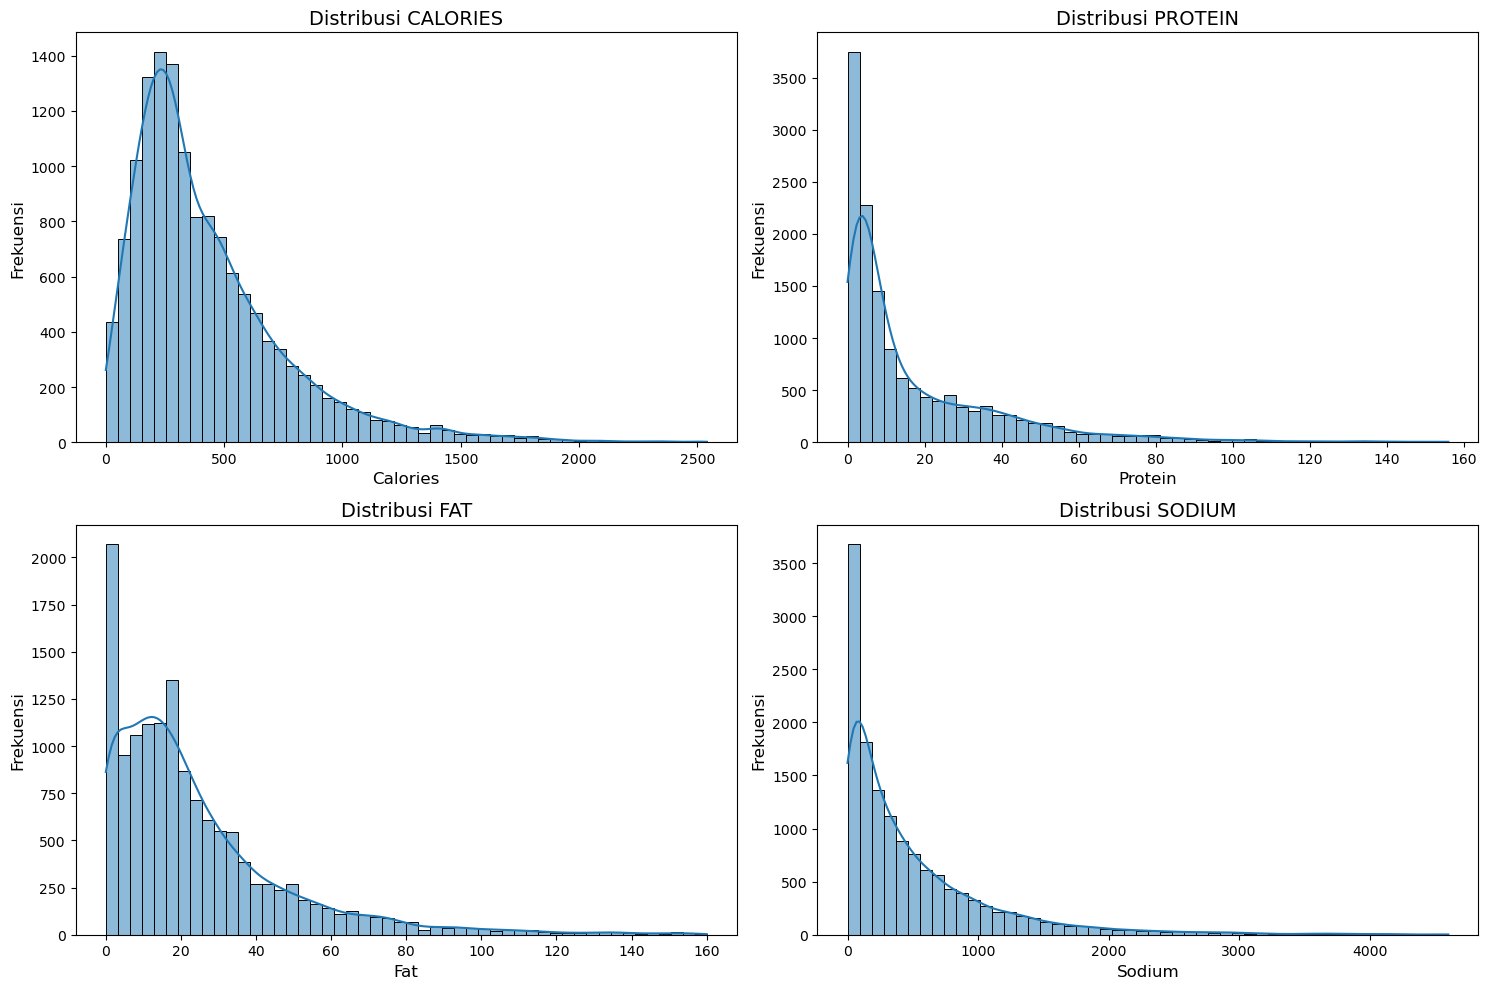

In [39]:
plt.figure(figsize=(15, 10))
df_nutri_cutted = df_numFeature_cleaned[nutri_cols]
for i, col in enumerate(nutri_cols):
    plt.subplot(2, 2, i + 1) # Membuat 4 subplot (2 baris, 2 kolom)
    
    # Menggunakan displot dengan parameter hist_kws untuk batas bin
    sns.histplot(df_nutri_cutted[col], kde=True, bins=50) 
    
    plt.title(f'Distribusi {col.upper()}', fontsize=14)
    plt.xlabel(col.capitalize(), fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)

plt.tight_layout()
plt.show()

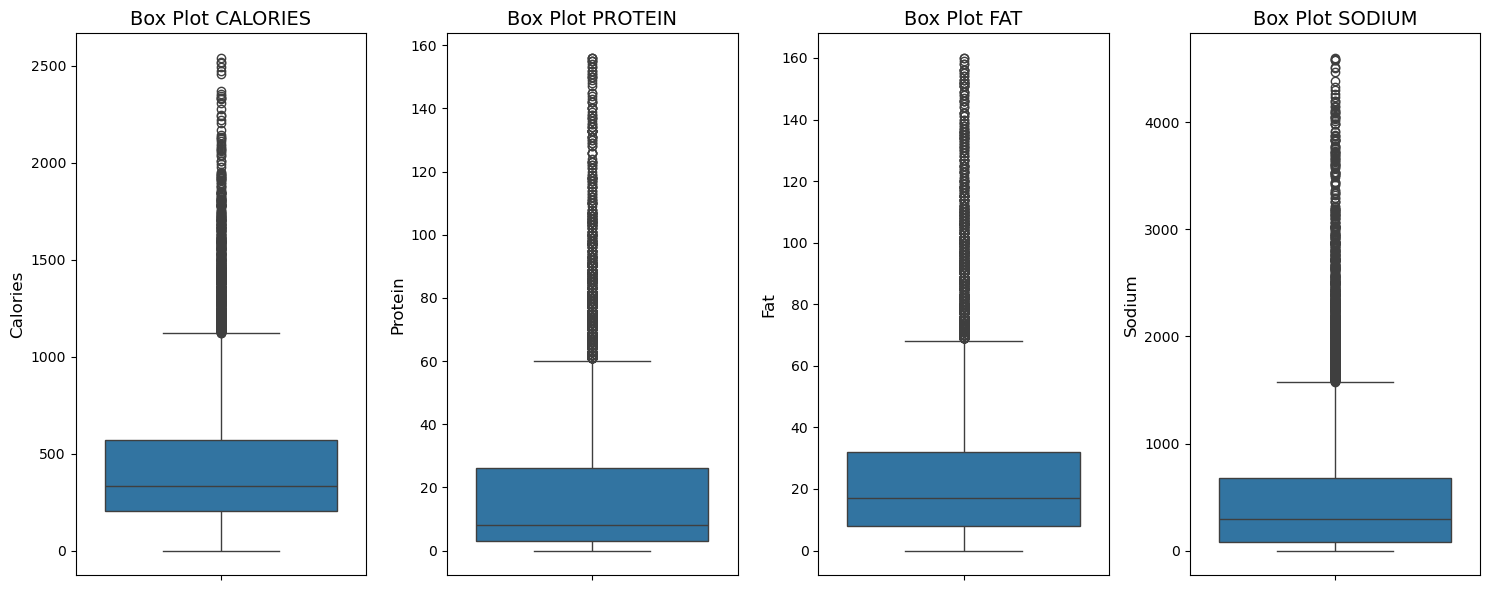

In [40]:
plt.figure(figsize=(15, 6))

for i, col in enumerate(nutri_cols):
    plt.subplot(1, 4, i + 1) # Membuat 4 subplot (1 baris, 4 kolom)
    
    # Menggunakan Box Plot
    sns.boxplot(y=df_nutri_cutted[col]) 
    
    plt.title(f'Box Plot {col.upper()}', fontsize=14)
    plt.ylabel(col.capitalize(), fontsize=12)

plt.tight_layout()
plt.show()

In [41]:
df_numFeature_cleaned['title_lower'] = df_numFeature_cleaned['title'].str.lower().str.strip()

In [42]:
df_numFeature_cleaned.shape

(13970, 681)

In [43]:
# delete duplicates based on title, keep the one with highest rating
highest_rating = 'rating'  # ganti dengan nama kolom rating yang sesuai
df_numFeature_cleaned = df_numFeature_cleaned.groupby('title_lower').apply(
    lambda group: group.loc[group[highest_rating].idxmax()]
).reset_index(drop=True)

C:\Users\ardik\AppData\Local\Temp\ipykernel_27944\1874124603.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_numFeature_cleaned = df_numFeature_cleaned.groupby('title_lower').apply(


In [44]:
df_numFeature_cleaned.columns

Index(['title', 'rating', 'calories', 'protein', 'fat', 'sodium', '#cakeweek',
       '#wasteless', '22-minute meals', '3-ingredient recipes',
       ...
       'yogurt', 'yonkers', 'yuca', 'zucchini', 'cookbooks', 'leftovers',
       'snack', 'snack week', 'turkey', 'title_lower'],
      dtype='object', length=681)

In [45]:
df_numFeature_cleaned.shape

(13590, 681)

In [46]:
# check duplicate title in df_numFeature_cleaned
duplicates = df_numFeature_cleaned.duplicated(subset=['title'], keep=False)
print(duplicates.sum())

# print the table of duplicates ordered by title
print(df_numFeature_cleaned[duplicates].sort_values(by='title')[['title']])


0
Empty DataFrame
Columns: [title]
Index: []


In [47]:
df_numFeature_cleaned.shape

(13590, 681)

### Merge Dataset

In [48]:
# 1) check matching antara kedua dataset yang dh clean
df_recipes_cleaned['exists_in_num'] = df_recipes_cleaned['title_lower'].isin(df_numFeature_cleaned['title_lower'])
df_numFeature_cleaned['exists_in_recipes'] = df_numFeature_cleaned['title_lower'].isin(df_recipes_cleaned['title_lower'])

df_recipes_cleaned['exists_in_num'].value_counts()
df_numFeature_cleaned['exists_in_recipes'].value_counts()

exists_in_recipes
False    9531
True     4059
Name: count, dtype: int64

In [49]:
df_merged = df_recipes_cleaned.merge(
    df_numFeature_cleaned,
    how='inner',
    on='title_lower'
)

In [50]:
df_merged = df_merged.drop(columns=['exists_in_num','exists_in_recipes'], inplace=False)

In [51]:
df_merged.shape

(4172, 688)

In [52]:
missing_report = df_merged.isna().sum()
print(missing_report[missing_report > 0])

Series([], dtype: int64)


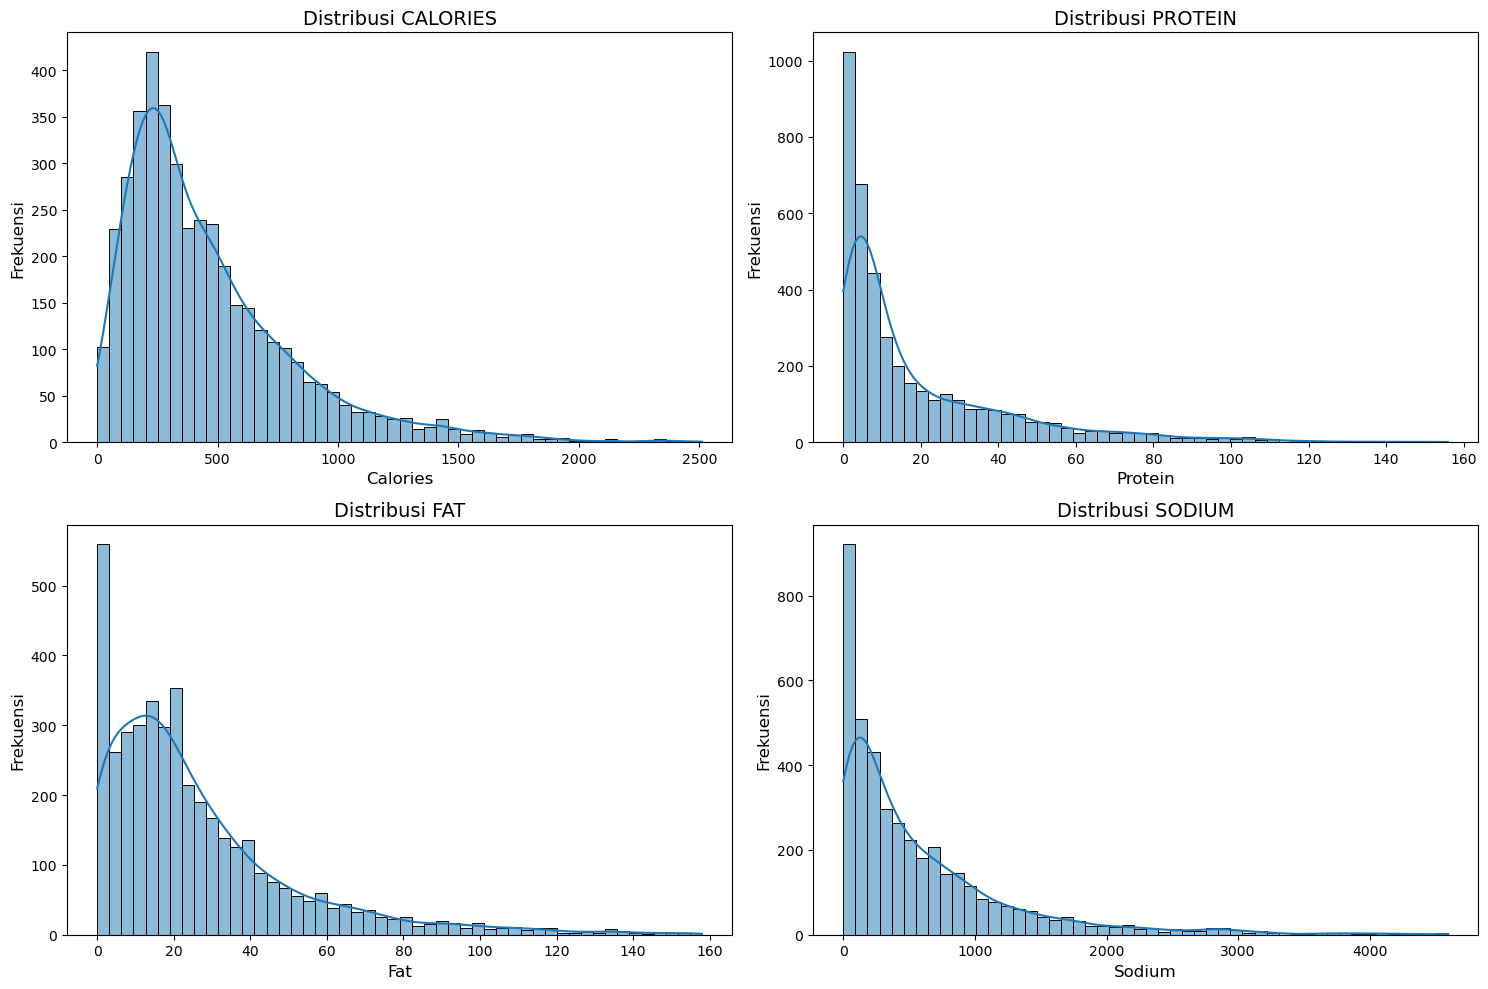

In [53]:
plt.figure(figsize=(15, 10))
df_nutri_cutted = df_merged[nutri_cols]
for i, col in enumerate(nutri_cols):
    plt.subplot(2, 2, i + 1) # Membuat 4 subplot (2 baris, 2 kolom)
    
    # Menggunakan displot dengan parameter hist_kws untuk batas bin
    sns.histplot(df_nutri_cutted[col], kde=True, bins=50) 
    
    plt.title(f'Distribusi {col.upper()}', fontsize=14)
    plt.xlabel(col.capitalize(), fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)

plt.tight_layout()
plt.show()

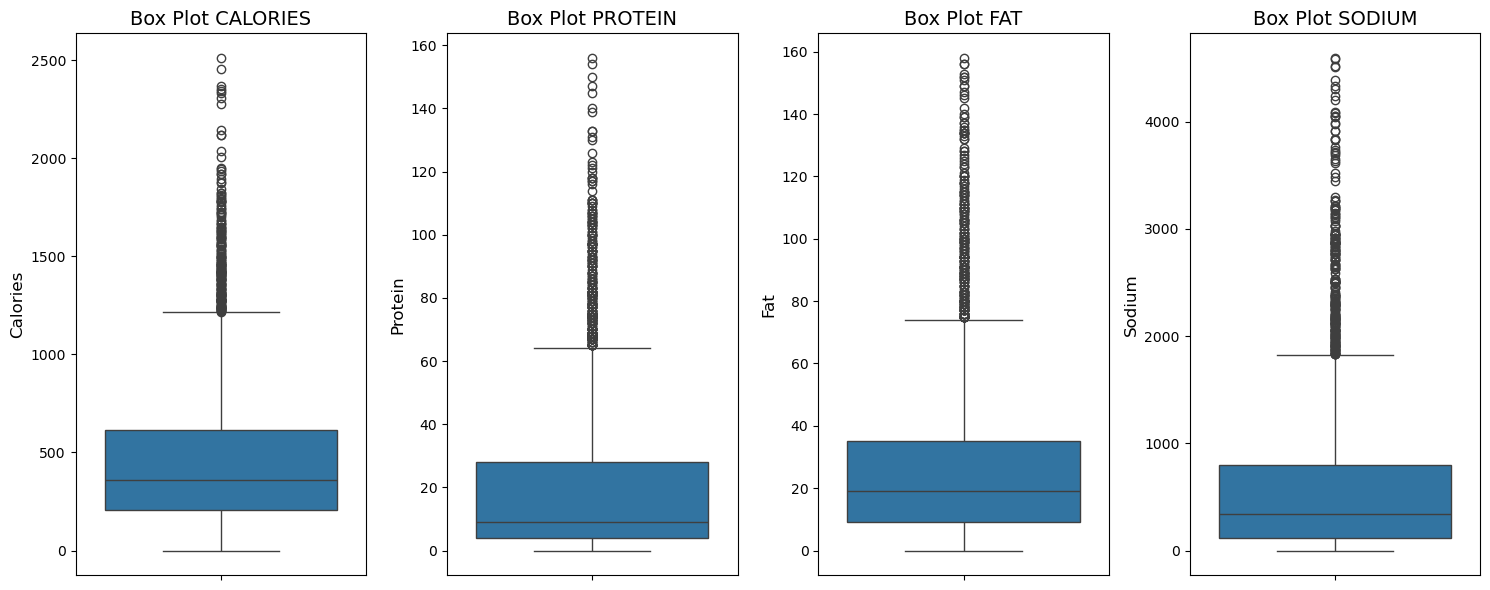

In [54]:
plt.figure(figsize=(15, 6))

for i, col in enumerate(nutri_cols):
    plt.subplot(1, 4, i + 1) # Membuat 4 subplot (1 baris, 4 kolom)
    
    # Menggunakan Box Plot
    sns.boxplot(y=df_nutri_cutted[col]) 
    
    plt.title(f'Box Plot {col.upper()}', fontsize=14)
    plt.ylabel(col.capitalize(), fontsize=12)

plt.tight_layout()
plt.show()

In [55]:
binary_cols = [
    '#cakeweek', '22-minute meals', '3-ingredient recipes', '30 days of groceries', 
    'advance prep required', 'alabama', 'alaska', 'alcoholic', 'almond', 
    'amaretto', 'anchovy', 'anise', 'anniversary', 'anthony bourdain', 
    'aperitif', 'appetizer', 'apple', 'apple juice', 'apricot', 'arizona', 
    'artichoke', 'arugula', 'asian pear', 'asparagus', 'aspen', 'atlanta', 
    'australia', 'avocado', 'back to school', 'backyard bbq', 'bacon', 
    'bake', 'banana', 'barley', 'basil', 'bass', 'bastille day', 'bean', 
    'beef', 'beef rib', 'beef shank', 'beef tenderloin', 'beer', 'beet', 
    'bell pepper', 'berry', 'beverly hills', 'birthday', 'biscuit', 
    'bitters', 'blackberry', 'blender', 'blue cheese', 'blueberry', 'boil', 
    'bok choy', 'bon appétit', 'bon app��tit', 'boston', 'bourbon', 
    'braise', 'bran', 'brandy', 'bread', 'breadcrumbs', 'breakfast', 'brie', 
    'brine', 'brisket', 'broccoli', 'broccoli rabe', 'broil', 'brooklyn', 
    'brown rice', 'brownie', 'brunch', 'brussel sprout', 'buffalo', 
    'buffet', 'bulgaria', 'bulgur', 'burrito', 'butter', 'buttermilk', 
    'butternut squash', 'butterscotch/caramel', 'cabbage', 'cake', 
    'california', 'calvados', 'cambridge', 'campari', 'camping', 'canada', 
    'candy', 'candy thermometer', 'cantaloupe', 'capers', 'caraway', 
    'cardamom', 'carrot', 'cashew', 'casserole/gratin', 'cauliflower', 
    'caviar', 'celery', 'chambord', 'champagne', 'chard', 'chartreuse', 
    'cheddar', 'cheese', 'cherry', 'chestnut', 'chicago', 'chicken', 
    'chickpea', 'chile', 'chile pepper', 'chili', 'chill', 'chive', 
    'chocolate', 'christmas', 'christmas eve', 'cilantro', 'cinco de mayo', 
    'cinnamon', 'citrus', 'clam', 'clove', 'cobbler/crumble', 'cocktail', 
    'cocktail party', 'coconut', 'cod', 'coffee', 'coffee grinder', 
    'cognac/armagnac', 'collard greens', 'colorado', 'columbus', 
    'condiment', 'condiment/spread', 'connecticut', 'cook like a diner', 
    'cookbook critic', 'cookie', 'cookies', 'coriander', 'corn', 'cornmeal', 
    'costa mesa', 'cottage cheese', 'couscous', 'crab', 'cranberry', 
    'cranberry sauce', 'cream cheese', 'créme de cacao', 'crêpe', 
    'cr��me de cacao', 'cuba', 'cucumber', 'cumin', 'cupcake', 'currant', 
    'curry', 'custard', 'dairy', 'dairy free', 'dallas', 'date', 'deep-fry', 
    'denver', 'dessert', 'digestif', 'dill', 'dinner', 'dip', 'diwali', 
    'dominican republic', 'dorie greenspan', 'double boiler', 'dried fruit', 
    'drink', 'drinks', 'duck', 'easter', 'eau de vie', 'edible gift', 'egg', 
    'egg nog', 'eggplant', 'egypt', 'emeril lagasse', 'endive', 
    'engagement party', 'england', 'entertaining', 'epi + ushg', 
    'epi loves the microwave', 'escarole', 'fall', 'family reunion', 
    'fat free', 'father\'s day', 'fennel', 'feta', 'fig', 'fish', 
    'flaming hot summer', 'flat bread', 'florida', 'fontina', 
    'food processor', 'fortified wine', 'fourth of july', 'france', 
    'frangelico', 'frankenrecipe', 'freeze/chill', 'freezer food', 
    'friendsgiving', 'frittata', 'fritter', 'frozen dessert', 'fruit', 
    'fruit juice', 'fry', 'game', 'garlic', 'georgia', 'germany', 'gin', 
    'ginger', 'goat cheese', 'goose', 'gouda', 'gourmet', 'graduation', 
    'grains', 'grand marnier', 'granola', 'grape', 'grapefruit', 'grappa', 
    'green bean', 'green onion/scallion', 'grill', 'grill/barbecue', 
    'ground beef', 'ground lamb', 'guam', 'guava', 'haiti', 'halibut', 
    'halloween', 'ham', 'hamburger', 'hanukkah', 'harpercollins', 'hawaii', 
    'hazelnut', 'healdsburg', 'healthy', 'herb', 'high fiber', 'hollywood', 
    'hominy/cornmeal/masa', 'honey', 'honeydew', 'hors d\'oeuvre', 
    'horseradish', 'hot drink', 'hot pepper', 'house & garden', 
    'house cocktail', 'houston', 'hummus', 'ice cream', 'ice cream machine', 
    'iced coffee', 'iced tea', 'idaho', 'illinois', 'indiana', 'iowa', 
    'ireland', 'israel', 'italy', 'jalapeño', 'jam or jelly', 'jamaica', 
    'japan', 'jerusalem artichoke', 'juicer', 'jícama', 'kahlúa', 'kale', 
    'kansas', 'kansas city', 'kentucky', 'kentucky derby', 'kid-friendly', 
    'kidney friendly', 'kirsch', 'kitchen olympics', 'kiwi', 'kosher', 
    'kosher for passover', 'kumquat', 'kwanzaa', 'labor day', 'lamb', 
    'lamb chop', 'lamb shank', 'lancaster', 'las vegas', 'lasagna', 
    'leafy green', 'leek', 'legume', 'lemon', 'lemon juice', 'lemongrass', 
    'lentil', 'lettuce', 'lima bean', 'lime', 'lime juice', 'lingonberry', 
    'liqueur', 'lobster', 'london', 'long beach', 'los angeles', 
    'louisiana', 'louisville', 'low cal', 'low carb', 'low cholesterol', 
    'low fat', 'low sodium', 'low sugar', 'low/no sugar', 'lunar new year', 
    'lunch', 'lychee', 'macadamia nut', 'macaroni and cheese', 'maine', 
    'mandoline', 'mango', 'maple syrup', 'mardi gras', 'margarita', 
    'marinade', 'marinate', 'marsala', 'marscarpone', 'marshmallow', 
    'martini', 'maryland', 'massachusetts', 'mayonnaise', 'meat', 
    'meatball', 'meatloaf', 'melon', 'mexico', 'mezcal', 'miami', 
    'michigan', 'microwave', 'midori', 'milk/cream', 'minneapolis', 
    'minnesota', 'mint', 'mississippi', 'missouri', 'mixer', 'molasses', 
    'monterey jack', 'mortar and pestle', 'mother\'s day', 'mozzarella', 
    'muffin', 'mushroom', 'mussel', 'mustard', 'mustard greens', 
    'nancy silverton', 'nebraska', 'nectarine', 'new hampshire', 
    'new jersey', 'new mexico', 'new orleans', 'new year\'s day', 
    'new year\'s eve', 'new york', 'no meat, no problem', 'no sugar added', 
    'no-cook', 'non-alcoholic', 'noodle', 'north carolina', 'nut', 'nutmeg', 
    'oat', 'oatmeal', 'octopus', 'ohio', 'oklahoma', 'okra', 'oktoberfest', 
    'olive', 'omelet', 'one-pot meal', 'onion', 'orange', 'orange juice', 
    'oregano', 'oregon', 'organic', 'orzo', 'oscars', 'oyster', 
    'pacific palisades', 'paleo', 'pan-fry', 'pancake', 'papaya', 'paprika', 
    'parade', 'paris', 'parmesan', 'parsley', 'parsnip', 'party', 
    'pasadena', 'passion fruit', 'passover', 'pasta', 'pasta maker', 
    'pastry', 'pea', 'peach', 'peanut', 'peanut butter', 'peanut free', 
    'pear', 'pecan', 'pennsylvania', 'pepper', 'pernod', 'persian new year', 
    'persimmon', 'peru', 'pescatarian', 'philippines', 
    'phyllo/puff pastry dough', 'pickles', 'picnic', 'pie', 'pine nut', 
    'pineapple', 'pistachio', 'pittsburgh', 'pizza', 'plantain', 'plum', 
    'poach', 'poblano', 'poker/game night', 'pomegranate', 
    'pomegranate juice', 'poppy', 'pork', 'pork chop', 'pork rib', 
    'pork tenderloin', 'port', 'portland', 'pot pie', 'potato', 
    'potato salad', 'potluck', 'poultry', 'poultry sausage', 
    'pressure cooker', 'prosciutto', 'providence', 'prune', 'pumpkin', 
    'punch', 'purim', 'quail', 'quiche', 'quick & easy', 
    'quick and healthy', 'quince', 'quinoa', 'rabbit', 'rack of lamb', 
    'radicchio', 'radish', 'raisin', 'ramadan', 'ramekin', 'raspberry', 
    'raw', 'red wine', 'rhode island', 'rhubarb', 'rice', 'ricotta', 
    'roast', 'root vegetable', 'rosemary', 'rosh hashanah/yom kippur', 
    'rosé', 'rub', 'rum', 'rutabaga', 'rye', 'saffron', 'sage', 'sake', 
    'salad', 'salad dressing', 'salmon', 'salsa', 'san francisco', 
    'sandwich', 'sandwich theory', 'sangria', 'santa monica', 'sardine', 
    'sauce', 'sausage', 'sauté', 'scallop', 'scotch', 'seafood', 'seattle', 
    'seed', 'self', 'semolina', 'sesame', 'sesame oil', 'shallot', 
    'shavuot', 'shellfish', 'sherry', 'shower', 'shrimp', 'side', 'simmer', 
    'skewer', 'slow cooker', 'smoker', 'smoothie', 'snapper', 'sorbet', 
    'soufflé/meringue', 'soup/stew', 'sour cream', 'sourdough', 
    'south carolina', 'soy', 'soy free', 'soy sauce', 'spain', 
    'sparkling wine', 'spice', 'spinach', 'spirit', 'spring', 'spritzer', 
    'squash', 'squid', 'st. louis', 'st. patrick\'s day', 'steak', 'steam', 
    'stew', 'stir-fry', 'stock', 'strawberry', 'stuffing/dressing', 
    'sugar conscious', 'sugar snap pea', 'sukkot', 'summer', 'super bowl', 
    'suzanne goin', 'sweet potato/yam', 'swiss cheese', 'switzerland', 
    'swordfish', 'taco', 'tailgating', 'tamarind', 'tangerine', 'tapioca', 
    'tarragon', 'tart', 'tea', 'tennessee', 'tequila', 'tested & improved', 
    'texas', 'thanksgiving', 'thyme', 'tilapia', 'tofu', 'tomatillo', 
    'tomato', 'tortillas', 'tree nut', 'tree nut free', 'triple sec', 
    'tropical fruit', 'trout', 'tuna', 'turnip', 'utah', 'valentine\'s day', 
    'vanilla', 'veal', 'vegan', 'vegetable', 'vegetarian', 'venison', 
    'vermont', 'vermouth', 'vinegar', 'virginia', 'vodka', 'waffle', 
    'walnut', 'wasabi', 'washington', 'washington, d.c.', 'watercress', 
    'watermelon', 'wedding', 'weelicious', 'west virginia', 'westwood', 
    'wheat/gluten-free', 'whiskey', 'white wine', 'whole wheat', 
    'wild rice', 'windsor', 'wine', 'winter', 'wisconsin', 'wok', 
    'yellow squash', 'yogurt', 'yonkers', 'yuca', 'zucchini', 'cookbooks', 
    'leftovers', 'snack', 'snack week', 'turkey', '#wasteless'
]

## Feature Engginering

In [56]:
"""
Melakukan penyaringan feature yang sesuai dimana sesuai dengan kriteria sebagai beriut ini :
Nutrition : 
- calories
- protein
- fat
- sodium

Allergens :
1 dairy
2 eggs
3 fish
4 shellfish
5 soy
6 sesame
7 wheat
8 peanuts
9 tree nuts

Dietary Preference :
1. Halal
2. Lactose Intolerance
3. Low Carb
4. Weight Loss
5. High Protein
6. Gluten-Free
7. Dairy-Free
8. Spicy
9. No Fried Food

Keterangan :
Halal
Makanan yang diproses dan disiapkan sesuai aturan Islam (tidak mengandung babi, alkohol, dan harus disembelih secara halal).

Lactose Intolerance
Tidak bisa mencerna laktosa, sehingga harus menghindari susu sapi dan produk berbahan susu yang ada laktosa (seperti keju atau yogurt biasa).

Keto / Low Carb
Pola makan yang sangat rendah karbohidrat dan tinggi lemak untuk membantu tubuh membakar lemak sebagai energi.

Weight Loss
Preferensi makanan rendah kalori, rendah gula, atau rendah lemak untuk membantu menurunkan berat badan.

High Protein
Fokus pada makanan tinggi protein seperti ayam, ikan, telur, tahu, dan kacang untuk membantu energi, kenyang lebih lama, atau membangun otot.

Gluten-Free
Menghindari gluten (protein dalam gandum, barley, rye) karena alergi, sensitivitas, atau gangguan pencernaan.

Dairy-Free
Menghindari semua produk susu (baik ada laktosa atau tidak) seperti susu, keju, mentega, yogurt — baik karena alergi maupun preferensi.

Spicy
Menyukai makanan pedas atau berbumbu kuat.

No Fried Food
Menghindari makanan yang digoreng untuk alasan kesehatan atau preferensi rasa (misalnya memilih panggang, kukus, atau rebus).
"""

'\nMelakukan penyaringan feature yang sesuai dimana sesuai dengan kriteria sebagai beriut ini :\nNutrition : \n- calories\n- protein\n- fat\n- sodium\n\nAllergens :\n1 dairy\n2 eggs\n3 fish\n4 shellfish\n5 soy\n6 sesame\n7 wheat\n8 peanuts\n9 tree nuts\n\nDietary Preference :\n1. Halal\n2. Lactose Intolerance\n3. Low Carb\n4. Weight Loss\n5. High Protein\n6. Gluten-Free\n7. Dairy-Free\n8. Spicy\n9. No Fried Food\n\nKeterangan :\nHalal\nMakanan yang diproses dan disiapkan sesuai aturan Islam (tidak mengandung babi, alkohol, dan harus disembelih secara halal).\n\nLactose Intolerance\nTidak bisa mencerna laktosa, sehingga harus menghindari susu sapi dan produk berbahan susu yang ada laktosa (seperti keju atau yogurt biasa).\n\nKeto / Low Carb\nPola makan yang sangat rendah karbohidrat dan tinggi lemak untuk membantu tubuh membakar lemak sebagai energi.\n\nWeight Loss\nPreferensi makanan rendah kalori, rendah gula, atau rendah lemak untuk membantu menurunkan berat badan.\n\nHigh Protein\nF

In [57]:
cols_to_check = ["dairy", "fish", "shellfish", "soy", "tree nut", "whole wheat", "egg", "sesame", "peanut"]

# Cek jumlah null di setiap kolom tersebut
print(df_merged[cols_to_check].isna().sum())

dairy          0
fish           0
shellfish      0
soy            0
tree nut       0
whole wheat    0
egg            0
sesame         0
peanut         0
dtype: int64


In [58]:
# Menambahkan fitur carbohidrate dengan menghitung dari calories, protein, fat
df_merged['carbohydrate'] = (df_merged['calories'] - (4 * df_merged['protein']) - (9 * df_merged['fat'])) / 4
df_merged['carbohydrate'] = df_merged['carbohydrate'].clip(lower=0).round(2)  # Pastikan tidak ada nilai negatif

In [59]:
df_merged[['calories', 'protein', 'fat', 'sodium', 'carbohydrate']].head()

,calories,protein,fat,sodium,carbohydrate
0,407.0,13.0,26.0,481.0,30.25
1,163.0,3.0,3.0,31.0,31.00
2,492.0,30.0,24.0,2187.0,39.00
3,369.0,6.0,14.0,323.0,54.75
4,2.0,0.0,0.0,23.0,0.50


In [60]:
# =========================================================
# 1) DEFINISI KELOMPOK BAHAN
# =========================================================

# Allergies List
dairy_keywords = [
    "blue cheese", "brie", "butter", "buttermilk", "casein", "cheddar", 
    "cheese", "condensed milk", "cottage cheese", "cream", "cream cheese", 
    "curd", "custard", "egg nog", "evaporated milk", "feta", "fontina", 
    "gelato", "ghee", "goat cheese", "gouda", "gruyere", "half-and-half", 
    "halloumi", "ice cream", "lactose", "mascarpone", "milk", "milk/cream", 
    "monterey jack", "mozzarella", "paneer", "parmesan", "pecorino", 
    "provolone", "pudding", "ricotta", "sour cream", "swiss cheese", 
    "whey", "yogurt", "egg nog"
]

fish_keywords = ["fish", "salmon", "tuna", "cod", "tilapia", "halibut", "trout", "snapper", "sardine",
    "anchovy", "anchovies", "mackerel", "herring", "catfish", "grouper", "mahi mahi",
    "bass", "haddock", "flounder", "perch", "sole", "pollock", "swordfish", "caviar", "roe",
    "fish sauce", "bonito"]

shellfish_keywords = ["shellfish", "shrimp", "prawn", "crab", "lobster", "crayfish", "crawfish", "krill",
    "clam", "mussel", "oyster", "scallop", "squid", "calamari", "octopus", "cuttlefish",
    "snail", "escargot", "abalone", "cockle", "conch"]

soy_keywords = ["soy", "soya", "soybean", "tofu", "tempeh", "edamame", "miso", "natto", 
    "tamari", "teriyaki", "shoyu", "vegetable protein", "textured vegetable protein", "tvp"]

peanut_keywords = [
    "peanut", "peanuts", "peanut butter", "groundnut", "satay sauce"
]

tree_nut_keywords = [
    "almond", "walnut", "pecan", "cashew", "pistachio", "hazelnut", "macadamia",
    "brazil nut", "pine nut", "chestnut", "nutella", "marzipan", "praline", "filbert"
]

sesame_keywords = [
    "sesame", "tahini", "halvah", "benne seed", "gingelly"
]

wheat_keywords = [
    "wheat", "flour", "bread", "pasta", "spaghetti", "macaroni", "noodle", "couscous",
    "semolina", "bulgur", "farro", "durum", "kamut", "spelt", "seitan", "gluten",
    "soy sauce", "cracker", "biscuit", "cookie", "cake", "muffin", "tortilla"
]



egg_keywords = [ "egg", "eggs", "egg white", "egg yolk", "mayonnaise", "mayo", "meringue", "albumin", "egg nog" ]


# Dietary Preferences List
# Haram (Babi & Alkohol)
haram_keywords = [
    "pork", "bacon", "ham", "prosciutto", "sausage", "chorizo", "pancetta", "lard", "pepperoni", "salami",
    "alcohol", "beer", "wine", "champagne", "spirit", "whiskey", "vodka", "rum", "gin", 
    "bourbon", "scotch", "tequila", "mezcal", "liqueur", "brandy", "cognac", "vermouth", 
    "sherry", "port wine", "sake", "mirin", "angostura"
]

# Pedas & Gorengan
spicy_keywords = [
    "chile", "chili", "jalapeño", "jalapeno", "habanero", "cayenne", "poblano", "serrano",
    "sriracha", "gochujang", "harissa", "wasabi", "hot sauce", "tabasco", "red pepper flakes",
    "curry paste", "ghost pepper", "sichuan pepper"
]

fried_keywords = [
    "fried", "deep-fried", "tempura", "fritter", "crispy skin"
]

# Weight Loss attributes (dari dataset)
weight_cols = ["healthy","low cal","low fat","low sugar","low/no sugar","fat free","high fiber"]

# =========================================================
# 2) PEMBUATAN FITUR
# =========================================================

# --- ALLERGENS ---
def check_allergen(text, keywords, exclude_terms=None):
    """
    Mengecek apakah text (ingredients) mengandung salah satu keyword.
    exclude_terms: daftar kata pengecualian (misal: 'eggplant' untuk 'egg')
    """
    if pd.isna(text) or text == "":
        return 0
    
    text = str(text).lower()
    
    # Cek Keywords
    for word in keywords:
        # Kita pakai word boundary (\b) agar 'coconut' tidak terdeteksi sebagai 'nut'
        # Tapi untuk simplicitas dan variasi penulisan, " in " string check sering lebih efektif
        
        if word in text:
            # --- LOGIC PENGECUALIAN (Validation) ---
            
            # Khusus EGG: Jangan deteksi 'eggplant' atau 'veggie'
            if word == "egg" or word == "eggs":
                if "eggplant" in text or "beggar" in text: 
                    continue # Skip, ini bukan telur
            
            # Khusus NUT: Hati-hati dengan 'butternut squash', 'coconut', 'nutmeg'
            if word in ["nut", "nuts"]:
                if "butternut" in text or "coconut" in text or "nutmeg" in text:
                    continue

            # Khusus MILK: Hati-hati dengan 'coconut milk' atau 'almond milk' (Dairy Free)
            if word == "milk":
                if "coconut milk" in text or "almond milk" in text or "soy milk" in text or "oat milk" in text:
                    continue
            
            # Khusus BUTTER: Hati-hati dengan 'peanut butter', 'apple butter'
            if word == "butter":
                if "peanut butter" in text or "almond butter" in text or "apple butter" in text or "cocoa butter" in text:
                    continue
            
            # Khusus CREAM: 'coconut cream'
            if word == "cream":
                if "coconut cream" in text:
                    continue

            return 1 # Ketemu!
            
    return 0

target_col = 'Ingredients'
print("Membuat fitur allergen...")

df_merged['has_dairy']    = df_merged[target_col].apply(lambda x: check_allergen(x, dairy_keywords))
df_merged['has_egg']      = df_merged[target_col].apply(lambda x: check_allergen(x, egg_keywords))
df_merged['has_fish']     = df_merged[target_col].apply(lambda x: check_allergen(x, fish_keywords))
df_merged['has_shellfish']= df_merged[target_col].apply(lambda x: check_allergen(x, shellfish_keywords))
df_merged['has_soy']      = df_merged[target_col].apply(lambda x: check_allergen(x, soy_keywords))
df_merged['has_sesame']   = df_merged[target_col].apply(lambda x: check_allergen(x, sesame_keywords))
df_merged['has_wheat']    = df_merged[target_col].apply(lambda x: check_allergen(x, wheat_keywords))
df_merged['has_peanut']   = df_merged[target_col].apply(lambda x: check_allergen(x, peanut_keywords))
df_merged['has_treenut']  = df_merged[target_col].apply(lambda x: check_allergen(x, tree_nut_keywords))

print("✅ Fitur allergen selesai dibuat!")

# --- B. BUAT FITUR DIETARY (Derived Logic) ---

# 1. HALAL
# Logic: Jika TIDAK mengandung Babi/Alkohol (check_allergen return 0) -> Maka Halal (1)
df_merged['is_haram_detected'] = df_merged[target_col].apply(lambda x: check_allergen(x, haram_keywords))
df_merged['halal'] = (df_merged['is_haram_detected'] == 0).astype(int)

# 2. DAIRY FREE & LACTOSE FREE
# Logic: Jika has_dairy == 0, maka Dairy Free
df_merged['dairy_free'] = (df_merged['has_dairy'] == 0).astype(int)
df_merged['is_lactose_free'] = df_merged['dairy_free'] # Asumsi sama untuk penyederhanaan

# 3. GLUTEN FREE
# Logic: Jika has_wheat == 0, maka Gluten Free
# (Note: Barley/Rye juga gluten, tapi wheat mencakup 90% kasus)
df_merged['gluten_free'] = (df_merged['has_wheat'] == 0).astype(int)

# 4. IS SPICY
# Cek ingredients untuk cabe-cabean
df_merged['is_spicy'] = df_merged[target_col].apply(lambda x: check_allergen(x, spicy_keywords))

# 5. IS NOT FRIED (Healthy)
# Cek Title atau Directions biasanya lebih akurat untuk teknik masak, tapi kita coba cek ingredients/teks dulu
# Logic: Jika TIDAK mengandung kata goreng -> Not Fried (1)
is_fried = df_merged[target_col].apply(lambda x: check_allergen(x, fried_keywords))
df_merged['is_not_fried'] = (is_fried == 0).astype(int)

# 6. HIGH PROTEIN (Statistik)
protein_median = df_merged["protein"].median()
df_merged["high_protein"] = (df_merged["protein"] > protein_median).astype(int)

# 7. LOW CARB (Statistik)
carb_median = df_merged["carbohydrate"].median()
df_merged["low_carb"] = (df_merged["carbohydrate"] < carb_median).astype(int)

# 8. WEIGHT LOSS (Composite)
# Logic: Weight Loss jika (Low Calorie) DAN (Healthy Tags lain)
# Kita pakai logika sederhana: Kalori di bawah median DAN Lemak di bawah median
cal_median = df_merged["calories"].median()
fat_median = df_merged["fat"].median()
df_merged["weight_loss"] = ((df_merged["calories"] < cal_median) & (df_merged["fat"] < fat_median)).astype(int)


print("Semua fitur Dietary & Allergen berhasil dibuat ulang dari Ingredients!")

Membuat fitur allergen...
✅ Fitur allergen selesai dibuat!
Semua fitur Dietary & Allergen berhasil dibuat ulang dari Ingredients!


In [61]:
# list semua fitur yang dipakai
diet_prefs = [
    "halal", "is_lactose_free", "low_carb", "weight_loss", 
    "high_protein", "gluten_free", "dairy_free",
    "is_spicy", "is_not_fried"
]

allergen_cols = [
    "has_dairy","has_egg","has_fish","has_shellfish","has_soy","has_sesame",
    "has_wheat","has_peanut","has_treenut"
]

In [62]:
# Hitung Cooking Time
def cooking_time(instructions: str):
    """Ekstraksi estimasi waktu memasak dari teks instruksi."""
    if not instructions or not isinstance(instructions, str):
        return pd.NA

    text = instructions.lower()
    found_times = []

    hrs = re.findall(r"(\d+(?:\.\d+)?)\s*(?:-|–|to)?\s*(\d+(?:\.\d+)?)?\s*(?:hr|hrs|hour|hours)", text)
    for low, high in hrs:
        val = float(high) if high else float(low)
        found_times.append(val * 60)

    mins = re.findall(r"(\d+)\s*(?:-|–|to)?\s*(\d+)?\s*(?:min|mins|minute|minutes)", text)
    for low, high in mins:
        val = int(high) if high else int(low)
        found_times.append(val)
    
    secs = re.findall(r"(\d+)\s*(?:sec|secs|second|seconds)", text)
    if secs and not found_times:
        return 1

    if found_times:
        return int(max(found_times))
    
    if "reheat" in text or "bake" in text:
        return 15
    
    if "rice cooker" in text:
        return 20  # Estimasi rata-rata rice cooker
    if "slow cooker" in text or "crock pot" in text:
        return 120 # Estimasi 2 jam
    if "oven" in text and "roast" in text:
        return 60  # Estimasi 1 jam
    
    # Juicer & Grinder (Untuk lemon juice, apple, spice grinder)
    if any(word in text for word in ["juicer", "grinder", "grind"]):
        return 5

    # Muddle & Crush (Untuk resep tangerines, muddler, spoon crush)
    if any(word in text for word in ["muddler", "crush", "spoon", "divide"]):
        if "ice" in text or "glass" in text:
            return 3 # Sangat cepat untuk minuman

    # Salad Assembly & Garnish (Untuk arugula, watermelon, arrange)
    if any(word in text for word in ["arrange", "scatter", "drizzle", "sprinkle", "garnish"]):
        return 5

    # Simple Mixing (Untuk mayonnaise, sour cream, mix)
    if any(word in text for word in ["mix", "mayonnaise", "sour cream"]):
        return 3
    
    # Smoothies & Puree (Paling banyak di sisa 28 resepmu)
    if any(word in text for word in ["puree", "purée", "smoothie", "blender", "food processor", "ice crush"]):
        return 10 # Estimasi waktu cuci bahan + blender
    
    # Resep Pasta/Mie (Orecchiette, Soba, dsb)
    if any(word in text for word in ["pasta", "noodles", "boiling water", "al dente", "package directions", "orecchiette", "boil", "noodles"]):
        return 12 # Rata-rata rebus pasta + persiapan

    # Resep Minuman/Cocktail (Prosecco, Stir, Gin)
    if any(word in text for word in ["pour", "stir", "club soda","shake", "shaker", "glass", "prosecco", "wine", "gin", "stir"]):
        return 3 # Sangat cepat

    # Resep Sandwich/Waffles/Snack Dingin (Sandwich together, Slice)
    if any(word in text for word in ["sandwich", "slice", "wrap", "spread", "rub"]):
        return 5 # Waktu menyusun bahan

    # Resep Saus/Salad/Whisk (Whisk, Toss, Combine)
    if any(word in text for word in ["whisk", "bowl", "sauce", "toss", "combine", "dressing"]):
        return 7
    
    return pd.NA

df_merged['cooking_time'] = df_merged['Instructions'].apply(cooking_time)

In [63]:
# # Setting Set View Output
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_seq_items', None)
# pd.reset_option('display.max_seq_items')
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')
# pd.reset_option('display.max_colwidth')

In [64]:
mis = df_merged.isna().sum()
mis[mis > 0]

Series([], dtype: int64)

In [65]:
df_merged['Ingredients'].head()

0    ['1 (¾- to 1-pound) round Italian loaf, cut in...
1    ['6 slices bacon, cut crosswise into ½-inch pi...
2    ['3 garlic cloves, minced', '2 large onions, c...
3    ['1½ cups raw Thai jasmine rice', '½ cup cocon...
4    ['1 gallon cold water', '1 (6-inch) square das...
Name: Ingredients, dtype: object

In [66]:
print(df_merged['cooking_time'].describe().astype(int))

count    4172
mean      102
std       228
min         1
25%        10
50%        30
75%       120
max      4320
Name: cooking_time, dtype: int32


In [67]:
df_merged.head()

,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients,title_lower,Ingredients_Text,ingredient_list,title,rating,...,halal,dairy_free,is_lactose_free,gluten_free,is_spicy,is_not_fried,high_protein,low_carb,weight_loss,cooking_time
0,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in...",italian sausage and bread stuffing,to round italian loaf into cubes olive oil swe...,"[turkey, sausage, egg, onion, parsley, garlic,...",Italian Sausage and Bread Stuffing,5.000,...,0,0,0,1,0,1,1,0,0,240
1,Butternut Squash and Apple Soup,"['6 slices bacon, cut crosswise into ½-inch pi...",Cook bacon in a 6-quart heavy pot over medium ...,butternut-squash-apple-soup-365210,"['6 slices bacon, cut crosswise into ½-inch pi...",butternut squash and apple soup,bacon crosswise into pieces celery ribs carrot...,"[water, onion, celery, apple, bacon, carrot, c...",Butternut Squash and Apple Soup,3.750,...,0,0,0,1,0,1,0,0,1,20
2,Shrimp Creole,"['3 garlic cloves, minced', '2 large onions, c...","In a large heavy kettle cook garlic, onions, c...",shrimp-creole-14653,"['3 garlic cloves, minced', '2 large onions, c...",shrimp creole,garlic cloves minced onions fine celery about ...,"[onion, cumin, celery, clove, garlic, bell pep...",Shrimp Creole,3.750,...,1,0,0,1,0,1,1,0,0,30
3,Coconut Rice,"['1½ cups raw Thai jasmine rice', '½ cup cocon...","To make the rice, which is best done in a rice...",coconut-rice-leela-punyaratabandhu,"['1½ cups raw Thai jasmine rice', '½ cup cocon...",coconut rice,raw thai jasmine rice coconut milk preferably ...,"[milk, water, sugar, coconut, rice]",Coconut Rice,4.375,...,1,1,1,1,0,1,0,0,0,20
4,Dashi,"['1 gallon cold water', '1 (6-inch) square das...","Put the water, dashima, shiitake mushrooms, an...",my-korea-dashi-hooni-kim,"['1 gallon cold water', '1 (6-inch) square das...",dashi,gallon cold water square dashima kombu dried s...,"[dashima, water, mushroom, kombu]",Dashi,4.375,...,1,1,1,1,0,1,0,1,1,1440


In [68]:
# check duplicate title,Ingredients, instruction in the dataset
duplicates = df_merged.duplicated(subset=['Title', 'Ingredients', 'Instructions'], keep=False)
print(duplicates.sum())

# print the table of duplicates
print(df_merged[duplicates][['Title', 'Ingredients', 'Instructions']])


0
Empty DataFrame
Columns: [Title, Ingredients, Instructions]
Index: []


In [69]:
df_merged.columns

Index(['Title', 'Ingredients', 'Instructions', 'Image_Name',
       'Cleaned_Ingredients', 'title_lower', 'Ingredients_Text',
       'ingredient_list', 'title', 'rating',
       ...
       'halal', 'dairy_free', 'is_lactose_free', 'gluten_free', 'is_spicy',
       'is_not_fried', 'high_protein', 'low_carb', 'weight_loss',
       'cooking_time'],
      dtype='object', length=709)

In [70]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_colwidth', None)

In [71]:
# Mencari yang list-nya benar-benar kosong
df_empty = df_merged[df_merged['ingredient_list'].map(len) == 0]
print(df_empty[['Title', 'Ingredients', 'ingredient_list']])

# print value count in df_empty
print(df_empty['Title'].value_counts())

# print the amount data in df_empty
print(f"Jumlah data dengan ingredient_list kosong: {len(df_empty)}")

Empty DataFrame
Columns: [Title, Ingredients, ingredient_list]
Index: []
Series([], Name: count, dtype: int64)
Jumlah data dengan ingredient_list kosong: 0


In [72]:
# printkan resep yang ingredients list kosong 
print(df_empty[['Title', 'Ingredients', 'ingredient_list']])

Empty DataFrame
Columns: [Title, Ingredients, ingredient_list]
Index: []


In [73]:
# == Config ==
OUTPUT_DIR = "../data/output"

DIETARY_PREF_COL_MAP = {
    "halal": "halal",
    "is_lactose_free": "lactose_free",
    "low_carb": "low_carb",
    "weight_loss": "weight_loss",
    "high_protein": "high_protein",
    "gluten_free": "gluten_free",
    "dairy_free": "dairy_free",
    "is_spicy": "spicy",
    "is_not_fried": "not_fried",
}

ALLERGY_COL_MAP = {
    "has_dairy": "has_dairy",
    "has_egg": "has_egg",
    "has_fish": "has_fish",
    "has_shellfish": "has_shellfish",
    "has_soy": "has_soy",
    "has_sesame": "has_sesame",
    "has_wheat": "has_wheat",
    "has_peanut": "has_peanut",
    "has_treenut": "has_treenut",
}

# == Helper ==
def ensure_output_dir(path: str):
    if not os.path.exists(path):
        os.makedirs(path)

def parse_text_list(value):
    """
    Parses ingredient_list or cleaned_ingredients columns.
    These usually look like: "['onion', 'pepper', 'corn']".
    """
    if value is None or (isinstance(value, float) and pd.isna(value)):
        return []

    s = str(value).strip()
    if s == "" or s == "[]":
        return []

    try:
        # ast.literal_eval sangat aman untuk mengubah string "[...]" menjadi list []
        # Ini akan menjaga teks '1½ cups rice' tetap utuh.
        items = ast.literal_eval(s)
        if isinstance(items, list):
            return [str(x).strip() for x in items if str(x).strip()]
    except (ValueError, SyntaxError):
        # Fallback jika format stringnya berantakan
        # Menghapus kurung siku di awal/akhir dan split manual
        text = s.strip("[]")
        # Menggunakan pembagi petik agar data yang mengandung koma di dalam teks tidak pecah
        return [x.strip(" '\"") for x in text.split("', '") if x.strip(" '\"")]

    return []

# == Table Builder ==
def build_recipe_table(df: pd.DataFrame) -> pd.DataFrame:
    """Membangun tabel resep utama dengan fitur yang sudah diproses."""
    recipes = pd.DataFrame()
    recipes["recipe_id"] = range(1, len(df) + 1)

    recipes["title"] = df.get("Title", "").astype(str)
    recipes["instructions"] = df.get("Instructions", "").astype(str)
    recipes["image"] = df.get("Image_Name", "").astype(str)
    recipes["cooking_time"] = df.get("cooking_time", "")

    # Slug generation
    base_slug = (
        recipes["title"]
        .str.strip()
        .str.lower()
        .str.replace(r"[^a-z0-9\s-]", "", regex=True)
        .str.replace(r"\s+", "-", regex=True)
    )
    random_suffixes = [uuid.uuid4().hex[:5] for _ in range(len(df))]
    recipes["slug"] = base_slug + "-" + pd.Series(random_suffixes, index=recipes.index)

    # --- PERBAIKAN LOGIKA DI SINI ---
    # Pastikan kita menggunakan Cleaned_Ingredients (Case Sensitive) jika ada
    # Jika tidak ada, gunakan ingredient_list
    target_col = "Cleaned_Ingredients" if "Cleaned_Ingredients" in df.columns else "cleaned_ingredients"
    if target_col not in df.columns:
        target_col = "ingredient_list"

    print(f"Menggunakan kolom '{target_col}' untuk measured_ingredients")

    # Proses: Ambil list -> Gabungkan dengan koma
    recipes["measured_ingredients"] = (
        df[target_col]
        .apply(parse_text_list)
        .apply(lambda lst: ", ".join(lst)) # Menggabungkan dengan separator koma
    )

    # Numeric nutrition fields
    for col in ["calories", "protein", "fat", "carbohydrate", "sodium", 'rating']:
        if col in df.columns:
            recipes[col] = pd.to_numeric(df[col], errors="coerce")
        else:
            recipes[col] = pd.NA

    return recipes

def build_ingredient_and_recipe_ingredient(df: pd.DataFrame):
    """Membangun tabel master ingredient dan tabel link recipe-ingredient."""
    ingredient_map = {}
    recipe_ing_rows = []
    ing_id = 1

    for idx, row in df.iterrows():
        recipe_id = idx + 1
        ingredients = parse_text_list(row.get("ingredient_list", ""))

        for ing in ingredients:
            key = ing.lower().strip()
            if not key:
                continue

            if key not in ingredient_map:
                ingredient_map[key] = {
                    "ingredient_id": ing_id,
                    "ingredient_name": ing.strip()
                }
                ing_id += 1

            recipe_ing_rows.append({
                "recipe_id": recipe_id,
                "ingredient_id": ingredient_map[key]["ingredient_id"]
            })

    ingredient_df = pd.DataFrame(ingredient_map.values())
    recipe_ingredient_df = pd.DataFrame(recipe_ing_rows).drop_duplicates()

    return ingredient_df, recipe_ingredient_df

def build_dietary_preference_tables(df: pd.DataFrame):
    """Membangun tabel master dietary preference dan tabel link recipe-dietary preference."""
    # Master table
    DIET_DESC_MAP = {
        "halal": "Permitted under Islamic law",
        "lactose_free": "No milk sugars present",
        "low_carb": "Minimizes sugars and grains",
        "weight_loss": "Supports calorie reduction goals",
        "high_protein": "Emphasizes protein-rich ingredients",
        "gluten_free": "Excludes wheat and barley",
        "dairy_free": "Contains no milk products",
        "spicy": "Contains hot or pungent flavors",
        "not_fried": "Prepared without deep-frying"
    }
    diet_rows = []
    seen_codes = set()
    for code in DIETARY_PREF_COL_MAP.values():
        if code not in seen_codes:
            seen_codes.add(code)
            diet_rows.append({
                "dietary_preference_id": len(seen_codes),
                "diet_code": code,
                "diet_name": code.replace("_", " ").title(),
                "diet_desc": DIET_DESC_MAP.get(code, "")
            })

    dietary_pref_df = pd.DataFrame(diet_rows)
    code_to_id = dict(zip(dietary_pref_df["diet_code"], dietary_pref_df["dietary_preference_id"]))

    # Link table
    rows = []
    for idx, row in df.iterrows():
        recipe_id = idx + 1
        for col, code in DIETARY_PREF_COL_MAP.items():
            if col in df.columns:
                val = row[col]
                if pd.notna(val) and str(val).strip() != "" and int(val) == 1:
                    rows.append({
                        "recipe_id": recipe_id,
                        "dietary_preference_id": code_to_id[code]
                    })

    recipe_dietary_pref_df = pd.DataFrame(rows).drop_duplicates()
    return dietary_pref_df, recipe_dietary_pref_df

def build_allergy_tables(df: pd.DataFrame):
    """Membangun tabel master allergy dan tabel link recipe-allergy."""
    # Master table
    EXAMPLES_MAP = {
        "has_dairy": "milk, cheese, yogurt, whey",
        "has_egg": "eggs, bread, cakes, pasta",
        "has_fish": "fish, fish stock, seafood sauce",
        "has_shellfish": "shrimp, lobster, crab",
        "has_soy": "tofu, tempeh, soybeans",
        "has_sesame": "sesame seeds & oil",
        "has_wheat": "bread, pasta, gluten foods",
        "has_peanut": "peanuts & processed",
        "has_treenut": "almonds, pistachios, walnuts"
    }
    allergy_rows = []
    seen_codes = set()
    for code in ALLERGY_COL_MAP.values():
        if code not in seen_codes:
            seen_codes.add(code)
            allergy_rows.append({
                "allergy_id": len(seen_codes),
                "allergy_code": code,
                "allergy_name": code.replace("has_", " ").title().strip(),
                "examples": EXAMPLES_MAP.get(code, "")
            })

    allergy_df = pd.DataFrame(allergy_rows)
    code_to_id = dict(zip(allergy_df["allergy_code"], allergy_df["allergy_id"]))

    # Link table
    rows = []
    for idx, row in df.iterrows():
        recipe_id = idx + 1
        for col, code in ALLERGY_COL_MAP.items():
            if col in df.columns:
                val = row[col]
                if pd.notna(val) and str(val).strip() != "" and int(val) == 1:
                    rows.append({
                        "recipe_id": recipe_id,
                        "allergy_id": code_to_id[code]
                    })

    recipe_allergy_df = pd.DataFrame(rows).drop_duplicates()
    return allergy_df, recipe_allergy_df


def main():
    ensure_output_dir(OUTPUT_DIR)
    df_categorize = df_merged.copy()

    print("CSV Loaded. Rows:", len(df_categorize), "| Columns:", len(df_categorize.columns))

    recipe_df = build_recipe_table(df_categorize)
    ingredient_df, recipe_ingredient_df = build_ingredient_and_recipe_ingredient(df_categorize)
    dietary_pref_df, recipe_dietary_pref_df = build_dietary_preference_tables(df_categorize)
    allergy_df, recipe_allergy_df = build_allergy_tables(df_categorize)

    # Write out normalized CSVs
    recipe_df.to_csv(os.path.join(OUTPUT_DIR, "recipe.csv"), index=False)
    ingredient_df.to_csv(os.path.join(OUTPUT_DIR, "ingredient.csv"), index=False)
    recipe_ingredient_df.to_csv(os.path.join(OUTPUT_DIR, "recipe_ingredient.csv"), index=False)
    dietary_pref_df.to_csv(os.path.join(OUTPUT_DIR, "dietary_preference.csv"), index=False)
    recipe_dietary_pref_df.to_csv(os.path.join(OUTPUT_DIR, "recipe_dietary_preference.csv"), index=False)
    allergy_df.to_csv(os.path.join(OUTPUT_DIR, "allergy.csv"), index=False)
    recipe_allergy_df.to_csv(os.path.join(OUTPUT_DIR, "recipe_allergy.csv"), index=False)

    print("ETL Complete! CSV files exported to:", OUTPUT_DIR)

if __name__ == "__main__":
    main()

CSV Loaded. Rows: 4172 | Columns: 709
Menggunakan kolom 'Cleaned_Ingredients' untuk measured_ingredients
ETL Complete! CSV files exported to: ../data/output


In [74]:
df_merged.drop(columns=['title', 'title_lower'], inplace=True)

In [75]:
df_merged.head()

,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients,Ingredients_Text,ingredient_list,rating,calories,protein,...,halal,dairy_free,is_lactose_free,gluten_free,is_spicy,is_not_fried,high_protein,low_carb,weight_loss,cooking_time
0,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in...",to round italian loaf into cubes olive oil swe...,"[turkey, sausage, egg, onion, parsley, garlic,...",5.000,407.0,13.0,...,0,0,0,1,0,1,1,0,0,240
1,Butternut Squash and Apple Soup,"['6 slices bacon, cut crosswise into ½-inch pi...",Cook bacon in a 6-quart heavy pot over medium ...,butternut-squash-apple-soup-365210,"['6 slices bacon, cut crosswise into ½-inch pi...",bacon crosswise into pieces celery ribs carrot...,"[water, onion, celery, apple, bacon, carrot, c...",3.750,163.0,3.0,...,0,0,0,1,0,1,0,0,1,20
2,Shrimp Creole,"['3 garlic cloves, minced', '2 large onions, c...","In a large heavy kettle cook garlic, onions, c...",shrimp-creole-14653,"['3 garlic cloves, minced', '2 large onions, c...",garlic cloves minced onions fine celery about ...,"[onion, cumin, celery, clove, garlic, bell pep...",3.750,492.0,30.0,...,1,0,0,1,0,1,1,0,0,30
3,Coconut Rice,"['1½ cups raw Thai jasmine rice', '½ cup cocon...","To make the rice, which is best done in a rice...",coconut-rice-leela-punyaratabandhu,"['1½ cups raw Thai jasmine rice', '½ cup cocon...",raw thai jasmine rice coconut milk preferably ...,"[milk, water, sugar, coconut, rice]",4.375,369.0,6.0,...,1,1,1,1,0,1,0,0,0,20
4,Dashi,"['1 gallon cold water', '1 (6-inch) square das...","Put the water, dashima, shiitake mushrooms, an...",my-korea-dashi-hooni-kim,"['1 gallon cold water', '1 (6-inch) square das...",gallon cold water square dashima kombu dried s...,"[dashima, water, mushroom, kombu]",4.375,2.0,0.0,...,1,1,1,1,0,1,0,1,1,1440


In [76]:
df_merged.insert(0, 'recipe_id', range(len(df_merged)))
df_merged.to_csv("../data/processed/Ingredients_And_Nutrition_Merged_New.csv", index=False)